# TF-MoDISco analysis with SeqExplainer
**Author**: Adam Klie<br> 
**Last Updated**: 01/28/2023

In [27]:
%matplotlib inline

In this tutorial, we illustrate a 

In [1]:
import eugene as eu

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


In [2]:
eu.external.kipoi.get_model_names("Basset")

Already up to date.


2    Basset
Name: model, dtype: object

In [3]:
basset = eu.external.kipoi.get_model("Basset")

Using downloaded and verified file: /cellar/users/aklie/.kipoi/models/Basset/downloaded/model_files/weights/4878981d84499eb575abd0f3b45570d3


In [4]:
import os
import h5py
import torch
import numpy as np
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene"
filepath = os.path.join(eu.settings.dataset_dir, "lee22", "Basset_data.h5")
h5 = h5py.File(filepath, "r")
x_test = h5["X_test"][:]
h5.close()

In [5]:
x_tensor = torch.tensor(np.expand_dims(x_test, axis=3))
x_tensor.shape

torch.Size([16703, 4, 600, 1])

In [6]:
import seqexplainer

In [29]:
explains = seqexplainer.attribute_on_batch(
    basset, 
    x_tensor, 
    target=13,
    method="GradientShap",
    reference_type="zero",
    batch_size=128
)

Computing feature attributions on batches of size 128:   0%|          | 0/131 [00:00<?, ?it/s]

In [1]:
test_explains = explains.squeeze()

NameError: name 'explains' is not defined

In [30]:
# Choose a random set of 10 seqs to visualize
import random
random.seed(42)
sort = random.sample(range(0, len(test_explains)), 10)


In [31]:
from seqexplainer._plot import plot_saliency_map

In [32]:
test_explains_np = test_explains.detach().cpu().numpy()

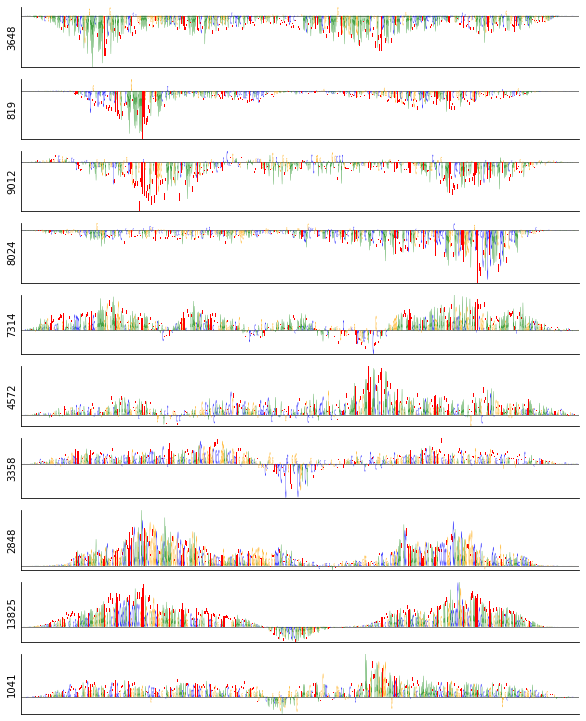

In [33]:
plot_saliency_map(test_explains_np, sort)

In [13]:
torch.cuda.empty_cache()